In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
#LEOLYU Loading
from google.colab import drive
drive.mount('/content/drive')

### TODO : please modify the line below with your drive organization ###
path = os.path.join(os.getcwd(), "drive", "MyDrive")
df = pd.read_csv(path+'/AB_NYC_2019.csv')

Mounted at /content/drive


##First we look at the result of some summary functions and drop the columns that we will not use.

In [ ]:
df.drop(['name','host_name','host_id'], axis=1, inplace=True)

Fill the NaN in different columns.

In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['last_review'] = pd.to_datetime(df['last_review'])
earliest = df['last_review'].min()
df['last_review'] = df['last_review'].fillna(earliest)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   neighbourhood_group             48895 non-null  object        
 2   neighbourhood                   48895 non-null  object        
 3   latitude                        48895 non-null  float64       
 4   longitude                       48895 non-null  float64       
 5   room_type                       48895 non-null  object        
 6   price                           48895 non-null  int64         
 7   minimum_nights                  48895 non-null  int64         
 8   number_of_reviews               48895 non-null  int64         
 9   last_review                     48895 non-null  datetime64[ns]
 10  reviews_per_month               48895 non-null  float64       
 11  ca

##Then we consider the categorical data: neighborhood_group, neighbourhood, room_type. Apply visualization and onehot encode.

In [ ]:
cat_label = ['neighbourhood_group','neighbourhood','room_type']

In [ ]:
df_cat = df[df.price < 2000][df.minimum_nights<100][cat_label]

<ipython-input-7-2f3eb7c182bd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cat = df[df.price < 2000][df.minimum_nights<100][cat_label]


In [ ]:
df_cat.shape

(48603, 3)

In [ ]:
df_cat

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room
3,Brooklyn,Clinton Hill,Entire home/apt
4,Manhattan,East Harlem,Entire home/apt
...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room
48891,Brooklyn,Bushwick,Private room
48892,Manhattan,Harlem,Entire home/apt
48893,Manhattan,Hell's Kitchen,Shared room


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_cat)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc.transform([['Bronx', 'Woodside','Shared room']]).toarray()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [ ]:
df_cats = enc.transform(df_cat).toarray()

In [ ]:
df_cats.shape

(48603, 229)

##Next, we consider the date data, which is the 'last_review' column.

In [ ]:
today = pd.to_datetime(df['last_review']).max()

In [ ]:
df['last_review'] = df['last_review'].apply(lambda x: (today - x).days)

In [ ]:
df['last_review']

0         262
1          48
2        3024
3           3
4         231
         ... 
48890    3024
48891    3024
48892    3024
48893    3024
48894    3024
Name: last_review, Length: 48895, dtype: int64

##Then we consider the digital data.

In [ ]:
dig_label = ['minimum_nights','calculated_host_listings_count','availability_365','price','number_of_reviews','reviews_per_month', 'last_review']
all_var = ['minimum_nights','calculated_host_listings_count','availability_365','price','reviews_per_month', 'latitude',	'longitude','number_of_reviews', 'last_review']

In [ ]:
df_dig = df[dig_label]
df_all = df[all_var]


In [ ]:
df_dig = df_dig[df_dig.price < 2000][df.minimum_nights<100]
df_all = df_all[df_all.price < 2000][df.minimum_nights<100]

<ipython-input-20-73c380b25797>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dig = df_dig[df_dig.price < 2000][df.minimum_nights<100]
<ipython-input-20-73c380b25797>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_all = df_all[df_all.price < 2000][df.minimum_nights<100]


In [ ]:
df_dig['price'] = np.log1p(df_dig['price'])
df_dig['minimum_nights'] = np.log1p(df_dig['minimum_nights'])
df_all['price'] = np.log1p(df_all['price'])
df_all['minimum_nights'] = np.log1p(df_all['minimum_nights'])

In [ ]:
y = df_dig['price']
df_digs = np.asarray(df_dig.drop(['price'],axis = 1))
X = np.concatenate((df_cats,df_digs),axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df_all

,minimum_nights,calculated_host_listings_count,availability_365,price,reviews_per_month,latitude,longitude,number_of_reviews,last_review
0,0.693147,6,365,5.010635,0.21,40.64749,-73.97237,9,262
1,0.693147,2,355,5.420535,0.38,40.75362,-73.98377,45,48
2,1.386294,1,365,5.017280,0.00,40.80902,-73.94190,0,3024
3,0.693147,1,194,4.499810,4.64,40.68514,-73.95976,270,3
4,2.397895,1,0,4.394449,0.10,40.79851,-73.94399,9,231
...,...,...,...,...,...,...,...,...,...
48890,1.098612,2,9,4.262680,0.00,40.67853,-73.94995,0,3024
48891,1.609438,2,36,3.713572,0.00,40.70184,-73.93317,0,3024
48892,2.397895,1,27,4.753590,0.00,40.81475,-73.94867,0,3024
48893,0.693147,6,2,4.025352,0.00,40.75751,-73.99112,0,3024


Combine categorical data and digital data to build up a model.

In [ ]:
y_all = df_all['price']
df_all_dropped = np.asarray(df_all.drop(['price'],axis = 1))
X_all = np.concatenate((df_cats,df_all_dropped),axis = 1)
all_train, all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=6, n_estimators=300)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(mean_squared_error(rf_pred, y_test))
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor(max_depth=8, learning_rate=0.1, n_estimators=100)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
print(mean_squared_error(xgb_pred, y_test))
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(max_depth=8, learning_rate=0.1, n_estimators=200)
lgbm.fit(X_train,y_train)
lgbm_pred = lgbm.predict(X_test)
print(mean_squared_error(lgbm_pred, y_test))

0.2018423621546603
0.17397177556306886
0.17113804119575024


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=6, n_estimators=300)
rf.fit(all_train,y_all_train)
rf_all_pred = rf.predict(all_test)
print(mean_squared_error(rf_all_pred, y_all_test))
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor(max_depth=8, learning_rate=0.1, n_estimators=100)
xgb.fit(all_train,y_all_train)
xgb_all_pred = xgb.predict(all_test)
print(mean_squared_error(xgb_all_pred, y_all_test))
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(max_depth=8, learning_rate=0.1, n_estimators=200)
lgbm.fit(all_train,y_all_train)
lgbm_all_pred = lgbm.predict(all_test)
print(mean_squared_error(lgbm_all_pred, y_all_test))

0.1885842294501249
0.16583090507207562
0.16457469675826958


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=8, n_estimators=300)
rf.fit(all_train,y_all_train)
rf_all_pred = rf.predict(all_test)
print(mean_squared_error(rf_all_pred, y_all_test))
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor(max_depth=8, learning_rate=0.1, n_estimators=300)
xgb.fit(all_train,y_all_train)
xgb_all_pred = xgb.predict(all_test)
print(mean_squared_error(xgb_all_pred, y_all_test))
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(max_depth=8, learning_rate=0.1, n_estimators=300)
lgbm.fit(all_train,y_all_train)
lgbm_all_pred = lgbm.predict(all_test)
print(mean_squared_error(lgbm_all_pred, y_all_test))

0.17739512086139503
0.16588033326563123
0.1639004582110518


In [ ]:
lgbm = LGBMRegressor(max_depth=8, learning_rate=0.1, n_estimators=300)
lgbm.fit(all_train,y_all_train)
lgbm_all_pred = lgbm.predict(all_test)
print(mean_squared_error(lgbm_all_pred, y_all_test))

0.1639004582110518


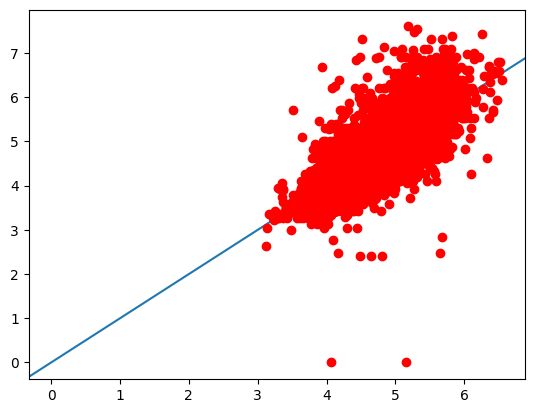

In [ ]:
fig, ax = plt.subplots()
ax.axline((0, 0), slope=1)
plt.plot(xgb_all_pred, y_all_test, 'o', color = 'red')

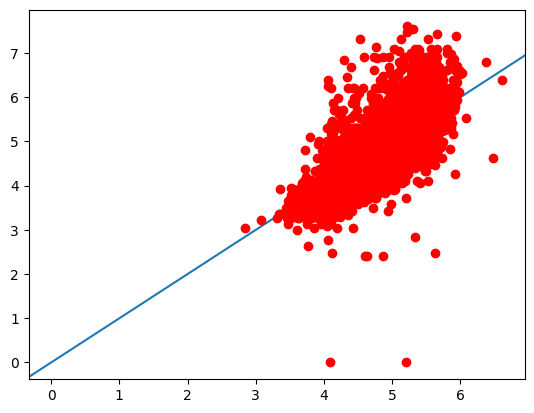

In [ ]:
fig, ax = plt.subplots()
ax.axline((0, 0), slope=1)
plt.plot(rf_all_pred, y_all_test, 'o', color = 'red')

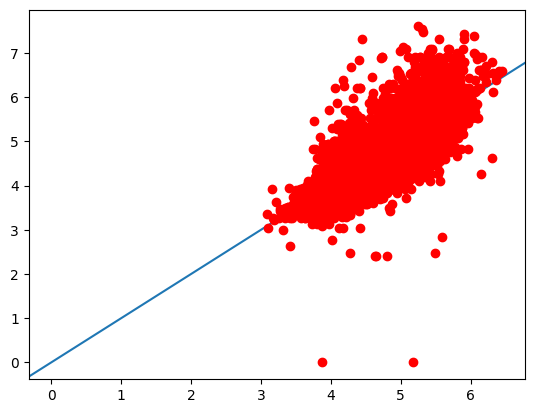

In [ ]:
fig, ax = plt.subplots()
ax.axline((0, 0), slope=1)
plt.plot(lgbm_all_pred, y_all_test, 'o', color = 'red')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

other_params = {'boosting_type' : 'gbdt',

                'objective': 'regression', 

                'n_estimators': 300,
                'max_depth': 8,
                'min_child_samples': 20,
                'reg_lambd': 0.1,
                'reg_alpha': 0.1,
                'metric': 'mse',
                'colsample_bytree': 1,
                'subsample': 0.8,
                'num_leaves' : 40,
                'random_state': 2018}
   

rds_params = {'n_estimators': range(100, 400, 50),
                      'min_child_weight': range(3, 15, 3),
                      'colsample_bytree': np.arange(0.4, 1.0),
                      'max_depth': range(6, 12, 2),
                      'subsample': np.arange(0.5, 1.0, 0.1),
                      'reg_lambda': np.arange(0.1, 1.0, 0.3),
                      'reg_alpha': np.arange(0.1, 1.0, 0.3),
                      'min_child_samples': range(10, 30,3)}
  

model = lgb.LGBMRegressor(**other_params)

optimized_GBM = RandomizedSearchCV(model , rds_params, n_iter=50, cv=5, n_jobs=4)
optimized_GBM.fit(all_train, y_all_train) 

print('Best params：{0}'.format(optimized_GBM.best_params_))

print('Best score:{0}'.format(optimized_GBM.best_score_))


[LightGBM] [Warning] Unknown parameter: reg_lambd
Best params：{'subsample': 0.6, 'reg_lambda': 0.4, 'reg_alpha': 0.7000000000000001, 'n_estimators': 350, 'min_child_weight': 6, 'min_child_samples': 16, 'max_depth': 8, 'colsample_bytree': 0.4}
Best score:0.6273735003693731


In [ ]:
opt_pred = optimized_GBM.predict(all_test)

In [ ]:
print(mean_squared_error(opt_pred, y_all_test))

0.16319181888704332


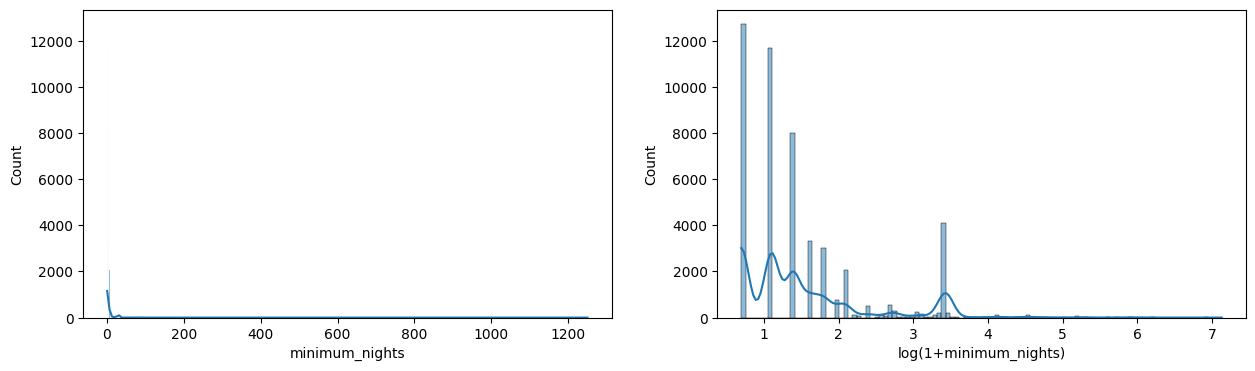

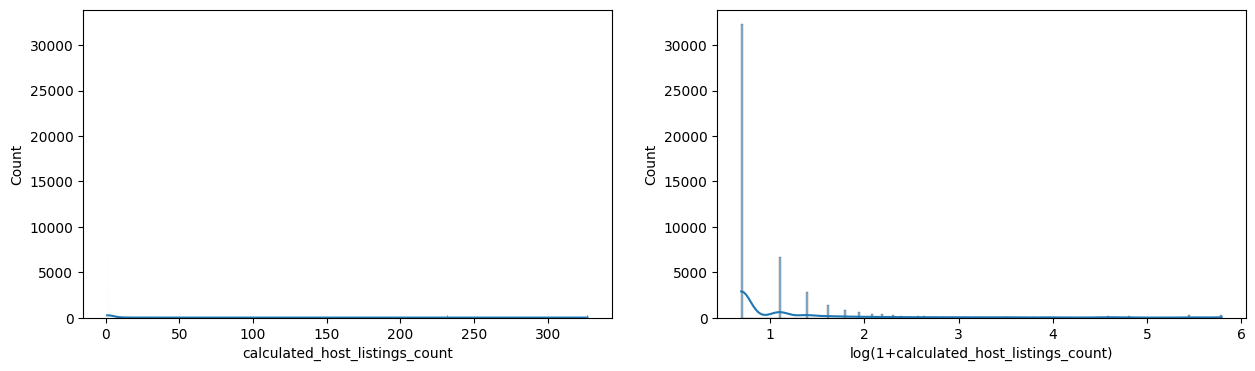

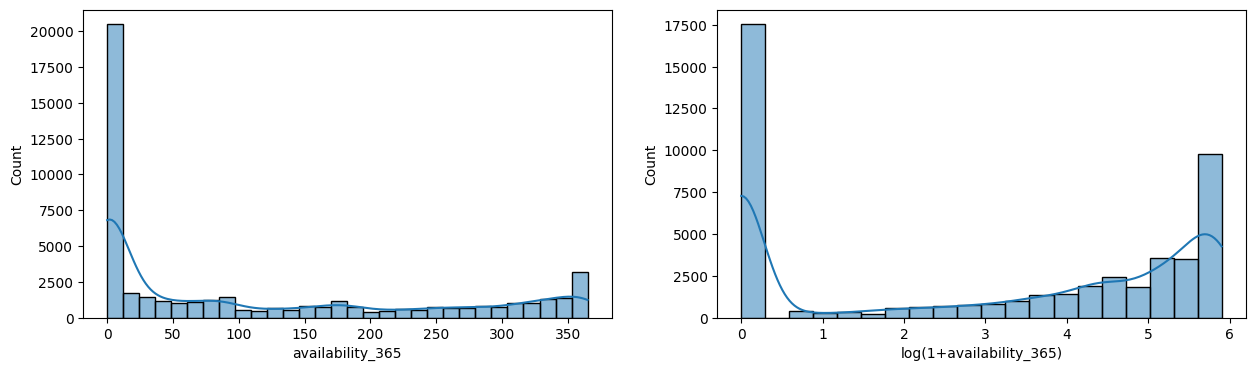

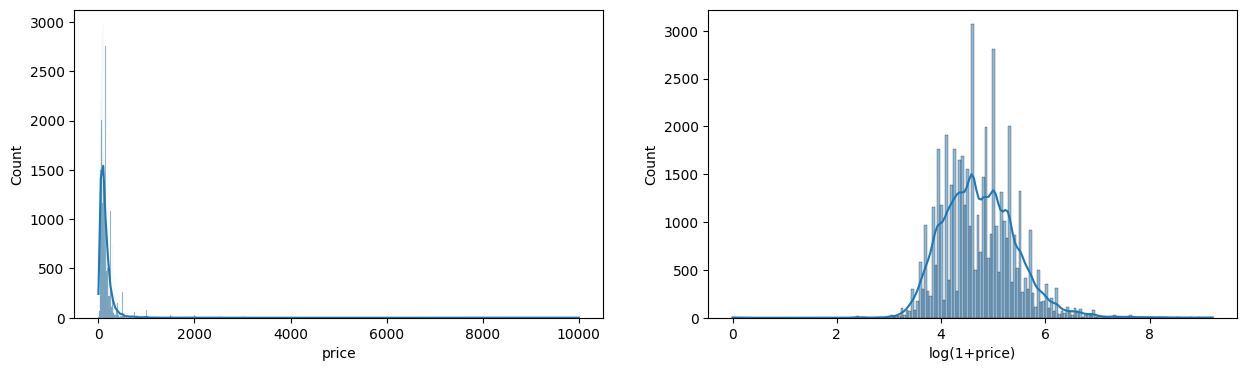

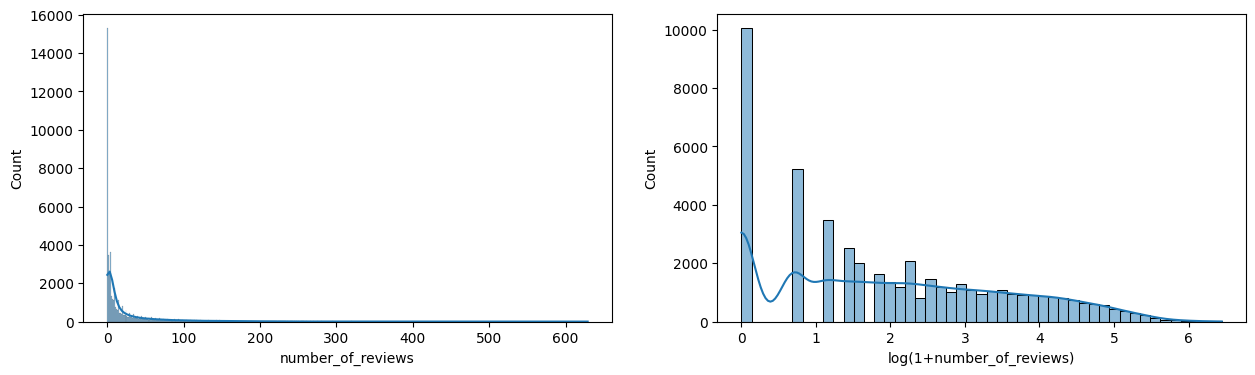

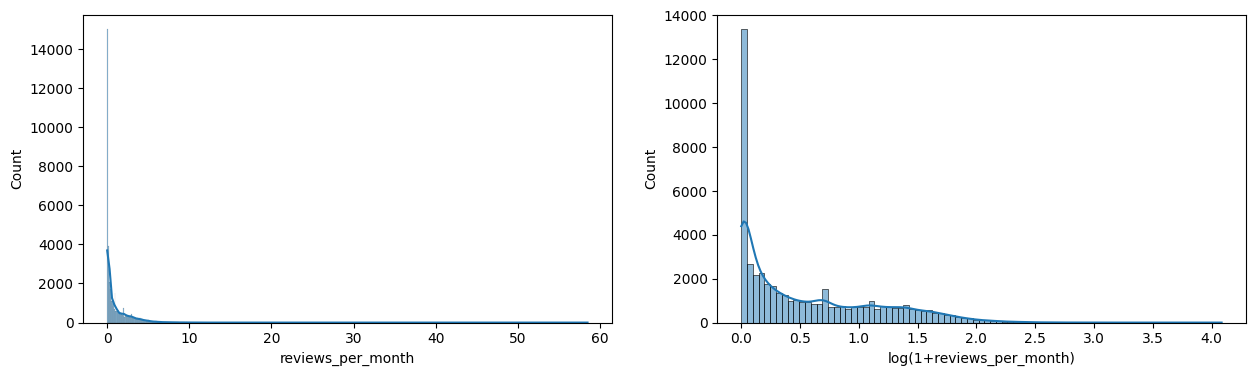

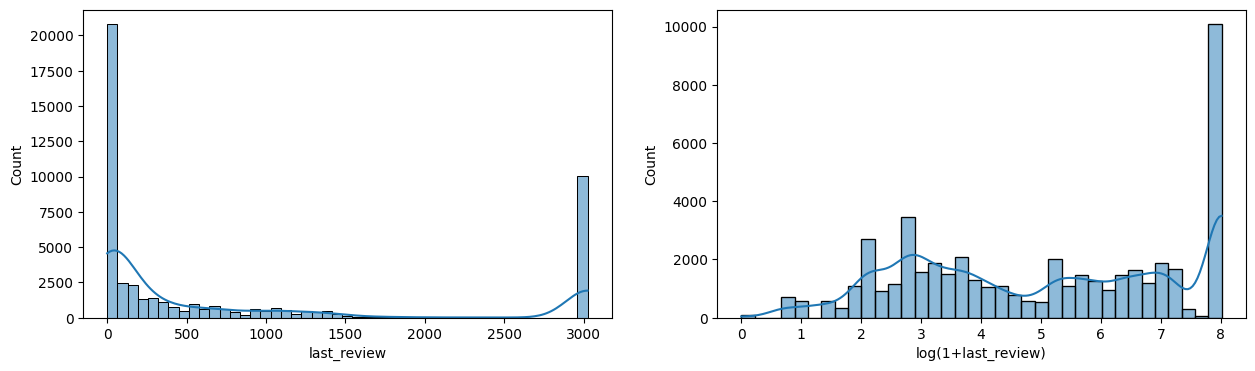

In [ ]:
for name in dig_label: 
  fig, axes = plt.subplots(1,2, figsize=(15,4))
  sns.histplot(df[name], ax=axes[0],kde = True)
  sns.histplot(np.log1p(df[name]), ax=axes[1],kde = True)
  axes[1].set_xlabel('log(1+' + name +')')

In [ ]:
df_med = df
nightMed = np.median(df_med['minimum_nights'])
print(nightMed)
for minNights in df_med['minimum_nights']:
  if minNights > 50:
    minNIghts = nightMed
    print(minNights)

3.0
90
60
180
90
200
90
65
90
55
60
120
90
365
180
90
365
122
180
60
240
180
88
115
150
90
90
370
60
60
365
60
80
181
90
80
265
300
180
60
180
59
185
180
365
60
360
90
56
60
90
60
70
120
120
120
115
365
120
1000
59
80
60
110
90
60
365
90
90
90
60
200
90
365
270
60
150
365
300
365
75
250
60
110
365
60
180
75
62
60
60
365
70
90
60
60
1250
364
90
74
180
200
198
100
60
60
90
100
90
365
500
90
180
120
90
500
60
60
150
365
91
100
100
200
60
60
59
60
90
90
120
180
60
480
120
500
90
80
60
60
120
360
90
53
60
56
80
180
90
99
55
160
60
90
90
60
999
180
180
90
365
365
60
90
90
500
180
120
120
186
60
180
150
60
180
120
180
365
90
60
80
60
365
180
366
365
90
90
90
68
90
90
120
270
60
90
90
120
99
70
90
365
365
60
91
360
120
90
60
120
60
60
75
93
100
100
180
60
120
90
90
180
365
365
150
60
90
60
90
90
90
60
180
300
90
59
90
87
90
90
300
120
180
183
90
90
62
60
110
70
90
365
90
60
90
88
180
60
90
299
360
90
90
55
90
90
90
90
60
60
90
999
60
80
120
120
60
60
300
100
100
100
175
180
60
90
60
60
60
60
9

In [ ]:
max(df_med['minimum_nights'])

1250